# # This notebook shows how to find the cars in an image

./training_images/vehicles/KITTI_extracted/4166.png


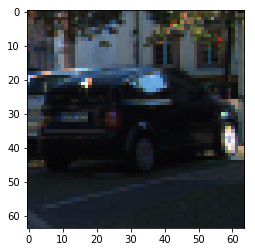

./training_images/non-vehicles/Extras/extra426.png


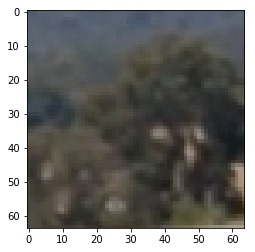

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import glob

file_name = random.choice(glob.glob('./training_images/vehicles/*/*.png'))
image_vehicle = mpimg.imread(file_name)

plt.imshow(image_vehicle)
print(file_name)
plt.show()

file_name = random.choice(glob.glob('./training_images/non-vehicles/*/*.png'))
image_nonvehicle = mpimg.imread(file_name)

plt.imshow(image_nonvehicle)
print(file_name)

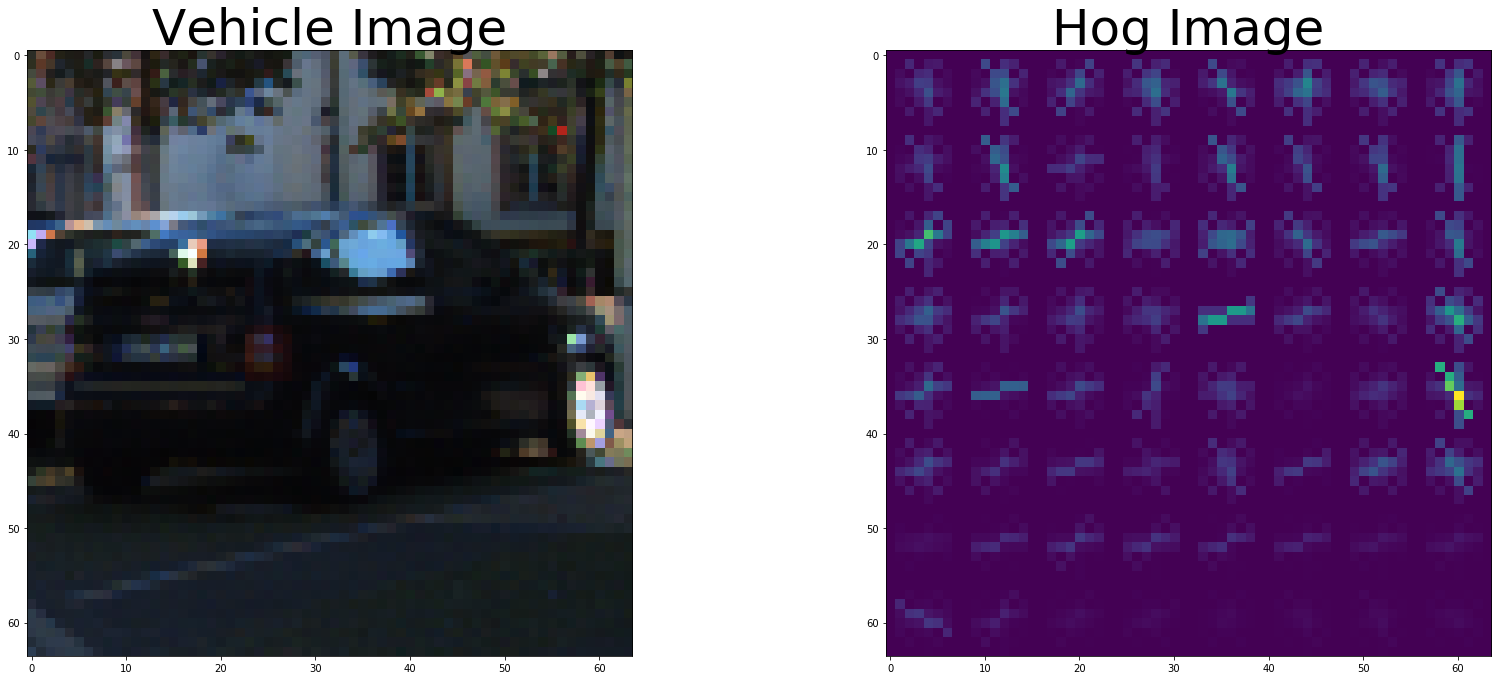

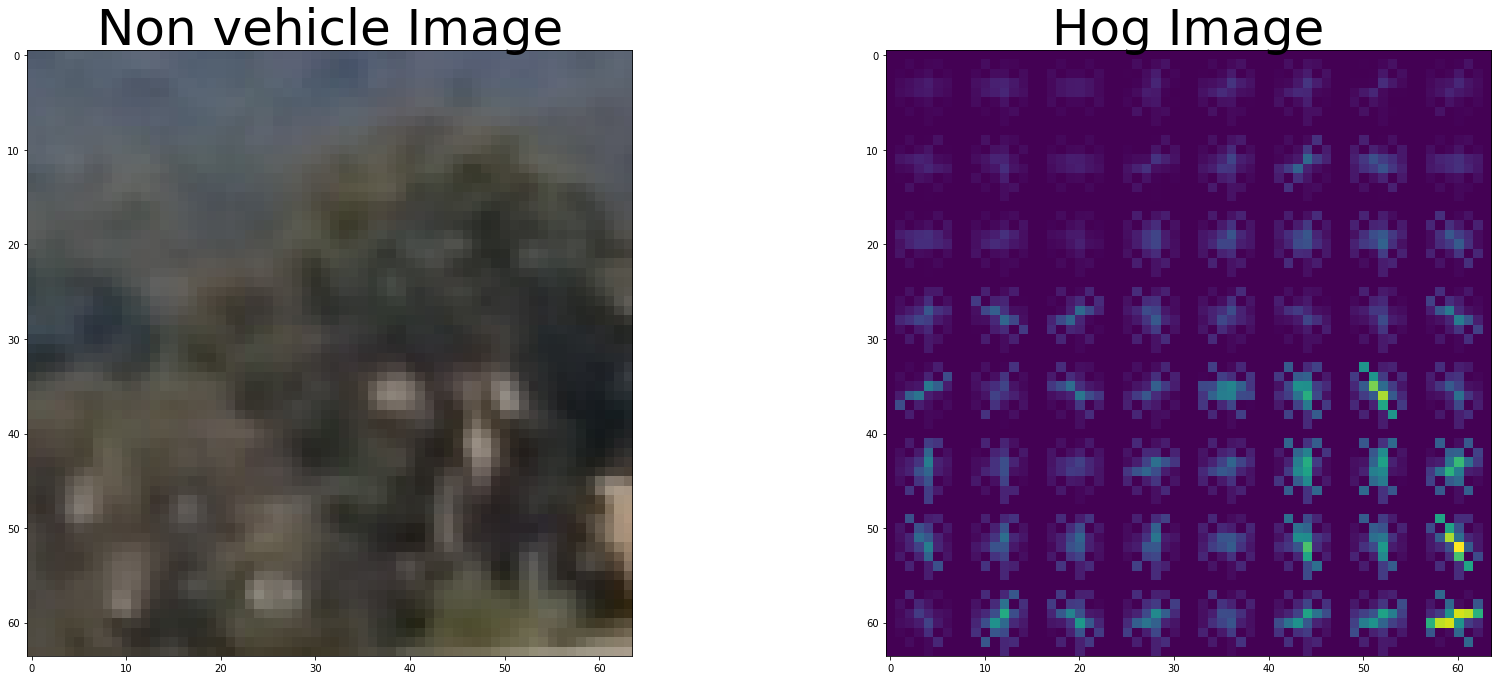

In [2]:
import cv2
from skimage.feature import hog
import numpy as np

# Define a function to return HOG features and visualization
def get_hog_features(image_ch, orient, pix_per_cell, cell_per_block, feature_vec=True, vis=False):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(image_ch, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec, block_norm="L2-Hys")
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(image_ch, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec, block_norm="L2-Hys")
        return features


gray = cv2.cvtColor(image_vehicle, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        feature_vec=False, vis=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_vehicle)
ax1.set_title('Vehicle Image', fontsize=50)
ax2.imshow(hog_image)
ax2.set_title('Hog Image', fontsize=50)
plt.show()

gray = cv2.cvtColor(image_nonvehicle, cv2.COLOR_RGB2GRAY)
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        feature_vec=False, vis=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_nonvehicle)
ax1.set_title('Non vehicle Image', fontsize=50)
ax2.imshow(hog_image)
ax2.set_title('Hog Image', fontsize=50)

In [3]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel()
    # Return the feature vector
    return features

hist_bins=32
hist_range=(0, 256)
print(color_hist(image_vehicle, nbins=hist_bins, bins_range=hist_range))

spatial_size=(32, 32)
print(bin_spatial(image_vehicle, size=spatial_size))

[4096    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 4096    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 4096    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[ 0.28039217  0.22058824  0.16470589 ...,  0.07843138  0.10490196
  0.13725491]


In [4]:
def convert_color(img, cspace='RGB'):
    feature_image = None
    if cspace == 'RGB':
        feature_image = np.copy(img)
    elif cspace == 'HSV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif cspace == 'LUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    elif cspace == 'HLS':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    elif cspace == 'YUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    elif cspace == 'YCrCb':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        print("Error color space not supported:",cspace)
    return feature_image


CSPACE='YCrCb'
HOG_ORIENT=9
HOG_PIX_PER_CELL=8
HOG_CELL_PER_BLOCK=2
SPATIAL_SIZE=(32, 32)
HIST_BINS=32
HIST_RANGE=(0, 256)

def extract_image_features(img, cspace=CSPACE, hog_orient=HOG_ORIENT,
                            hog_pix_per_cell=HOG_PIX_PER_CELL,
                            hog_cell_per_block=HOG_CELL_PER_BLOCK,
                            spatial_size=SPATIAL_SIZE,
                            hist_bins=HIST_BINS,
                            hist_range=HIST_RANGE):
    # force input img to be of range (0,255) 'uint8', for consistency sake
    if np.max(img)<=1.0:
        img = img*255
        img = img.astype(np.uint8)
    feature_image = convert_color(img, cspace)
    hog_feat0 = get_hog_features(feature_image[:,:,0], hog_orient,
                                    hog_pix_per_cell, hog_cell_per_block,
                                    True)
    hog_feat1 = get_hog_features(feature_image[:,:,1], hog_orient,
                                    hog_pix_per_cell, hog_cell_per_block,
                                    True)
    hog_feat2 = get_hog_features(feature_image[:,:,2], hog_orient,
                                    hog_pix_per_cell, hog_cell_per_block,
                                    True)
    
    hog_features = np.hstack((hog_feat0, hog_feat1, hog_feat2))
    spatial_features = bin_spatial(feature_image, size=spatial_size)
    hist_features = color_hist(feature_image, nbins=hist_bins,
                                                   bins_range=hist_range)
    current_features = np.concatenate((spatial_features, 
                                        hist_features,
                                       hog_features),
                                      axis=0)
    # Return list of feature vectors
    return current_features

features = extract_image_features(image_vehicle)
print(features.shape)
print(features)

(8460,)
[  59.          137.          118.         ...,    0.82629024    0.25215488
    0.93236709]


221.78 Seconds to extracting features...


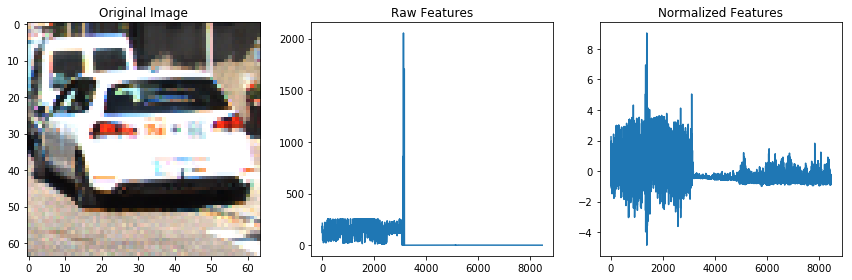

In [5]:
from sklearn.preprocessing import StandardScaler
import time

def extract_features_for_images(images):
    # Create a list to append feature vectors to
    features_list = []
    # Iterate through the list of images
    for image_file in images:
        img = mpimg.imread(image_file)
        features_list.append(extract_image_features(img))
    return features_list

cars = glob.glob('./training_images/vehicles/*/*')
notcars = glob.glob('./training_images/non-vehicles/*/*')

t=time.time()
car_features = extract_features_for_images(cars)
notcar_features = extract_features_for_images(notcars)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extracting features...')

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    y = np.hstack((np.ones(len(car_features)), 
              np.zeros(len(notcar_features))))
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [6]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, GridSearchCV, train_test_split

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

# Apply the scaler to both X_train and X_test
scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

use_grid_search = False

if use_grid_search:
    parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.001]}
    svr = svm.SVC()
    svc_all = GridSearchCV(svr, parameters)
else:
    # Use a linear SVC (support vector classifier)
    svc_all = svm.LinearSVC()

# Train the SVC
t=time.time()
svc_all.fit(scaled_X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

print('Test Accuracy of SVC = ', svc_all.score(scaled_X_test, y_test))

print('My SVC predicts: ', svc_all.predict(scaled_X_test[0:10]))
print('For labels:      ', y_test[0:10])

34.47 Seconds to train SVC...
Test Accuracy of SVC =  0.98902027027
My SVC predicts:  [ 0.  0.  0.  1.  0.  1.  1.  1.  0.  0.]
For labels:       [ 0.  0.  0.  1.  0.  1.  1.  1.  0.  0.]


In [7]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 3)
    # Return the image
    return img

# Add heat to each box in box list
#heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
#heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
#heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
#labels = label(heatmap)
#draw_img = draw_labeled_bboxes(np.copy(image), labels)


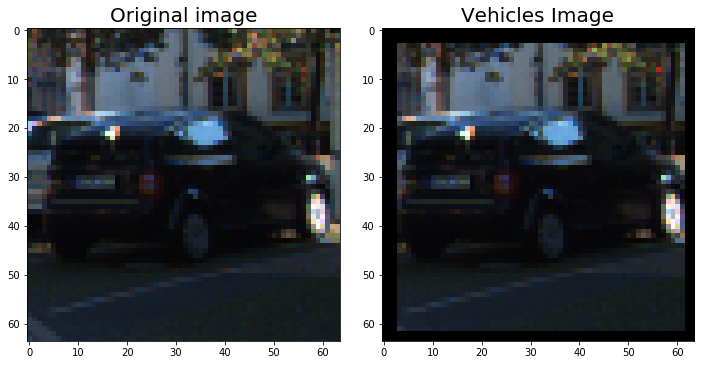

In [8]:
from collections import deque

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc=svc_all,
              X_scaler_=X_scaler, cspace = CSPACE,
              cells_per_step = 2,
              orient=HOG_ORIENT,
              pix_per_cell=HOG_PIX_PER_CELL,
              cell_per_block=HOG_CELL_PER_BLOCK,
              hog_feature_vec=False,
              spatial_size=SPATIAL_SIZE,
              hist_bins=HIST_BINS, hist_range=HIST_RANGE,
              prediction_threshold = 0.25):
    
    # force input img to be of range (0,255) 'uint8', for consistency sake
    if np.max(img)<=1.0:
        img = img*255
        img = img.astype(np.uint8)

    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, cspace)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=hog_feature_vec)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=hog_feature_vec)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=hog_feature_vec)
    
    box_list=[]
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins,
                                                   bins_range=hist_range)

            # Scale features and make a prediction
            test_features = X_scaler_.transform(np.hstack((spatial_features,
                                                            hist_features, hog_features))
                                               .reshape(1, -1))
            test_prediction = svc.decision_function(test_features)
            if test_prediction > prediction_threshold:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                box_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return box_list

ystart = 0
ystop = 64
scale = 1

box_list = find_cars(image_vehicle, ystart, ystop, scale)
  
for box in box_list:
    draw_img=cv2.rectangle(np.copy(image_vehicle), box[0],
                              box[1],
                              (0,0,255),3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(image_vehicle)
ax1.set_title("Original image", fontsize=20)
ax2.imshow(draw_img)
ax2.set_title('Vehicles Image', fontsize=20)

In [9]:
def reset_stored_heat():
    global stored_heat
    stored_heat = deque(maxlen = 12)

def find_cars_heat(img, res_stored_heat=False):
    ystart_ystop_cellstep_scales=[(370,600,1,1.0),(390,650,1,1.2),
                                  (393,660,1,1.5),(396,670,2,1.8),
                                  (400,680,2,2.0)]
    svc=svc_all
    X_scaler_=X_scaler
    cspace = CSPACE
    orient=HOG_ORIENT
    pix_per_cell=HOG_PIX_PER_CELL
    cell_per_block=HOG_CELL_PER_BLOCK
    hog_feature_vec=False
    spatial_size=SPATIAL_SIZE
    hist_bins=HIST_BINS
    hist_range=HIST_RANGE
    heat_threshold=(8/3.0)
    prediction_threshold = 1

    heatmap = np.zeros(img.shape[:2]).astype(np.uint8)

    global stored_heat
    if res_stored_heat:
        reset_stored_heat()
        no_frames=1
        least_positive_frames=1
    else:
        no_frames = len(stored_heat)
        least_positive_frames=4

    # iterate throughall the search window sizes
    for ystart,ystop,cell_per_step,scale in ystart_ystop_cellstep_scales:
        bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler,
                              cspace, cell_per_step, orient, pix_per_cell,
                              cell_per_block,hog_feature_vec, spatial_size,
                              hist_bins, hist_range,
                             prediction_threshold)
        heatmap = add_heat(heatmap, bbox_list)

    stored_heat.append(heatmap)

    heatmap = apply_threshold(sum(stored_heat),
                              heat_threshold*no_frames)
    heatmap = np.clip(heatmap, 0, 255)

    labels = label(heatmap/least_positive_frames)

    # draw final boxed image
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    return draw_img

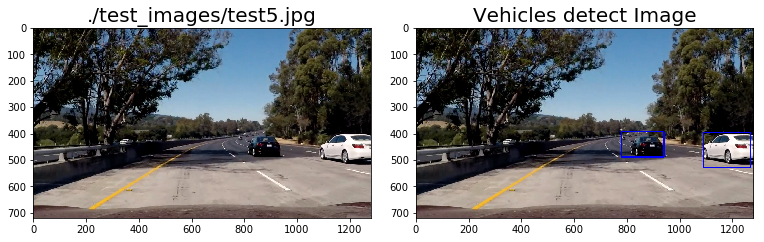

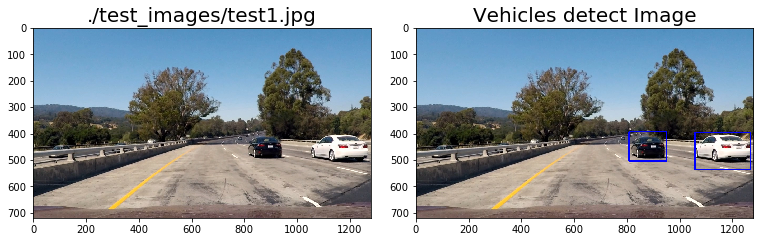

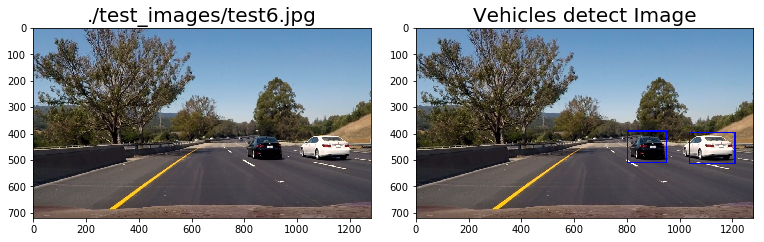

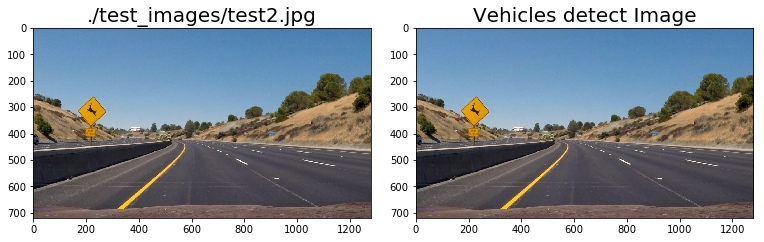

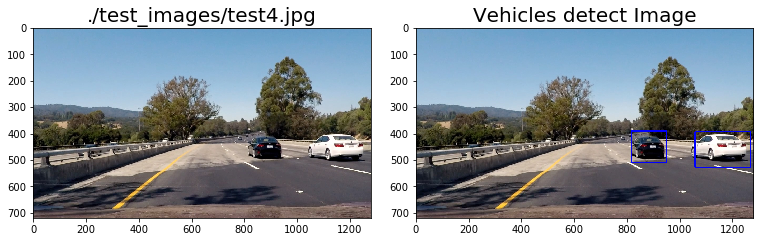

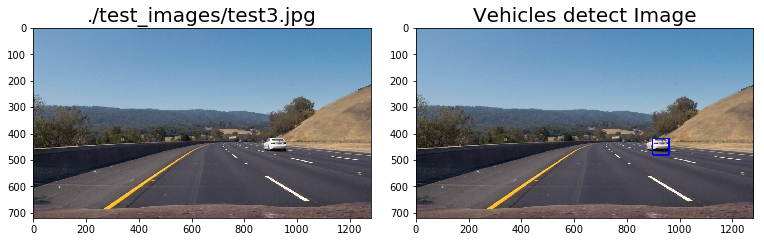

In [10]:
images = glob.glob('./test_images/*jpg')

for image_file in images:
    curr_image = mpimg.imread(image_file)
    car_detect_image = find_cars_heat(curr_image,
                                 res_stored_heat=True)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    f.tight_layout()
    ax2.imshow(car_detect_image, cmap='gray')
    ax2.set_title('Vehicles detect Image', fontsize=20)
    ax1.imshow(curr_image)
    ax1.set_title(image_file, fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [11]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

videos = glob.glob('./*.mp4')

for video in videos:
    file_name, ext = os.path.splitext(video)
    if 'output' in file_name:
        continue
    output_video = os.path.join(os.path.dirname(video), file_name+'_output'+ext)
    clip = VideoFileClip(video)
    if False:
        if 'project_video' in file_name:
            #clip = clip.subclip(0, 3)
            clip = clip.subclip(18, 27)
            pass
        else:
            continue
    reset_stored_heat()
    vid_clip = clip.fl_image(find_cars_heat)
    %time vid_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video ././test_video_output.mp4
[MoviePy] Writing video ././test_video_output.mp4


 97%|█████████▋| 38/39 [02:51<00:04,  4.51s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ././test_video_output.mp4 

CPU times: user 2min 57s, sys: 780 ms, total: 2min 58s
Wall time: 2min 52s
[MoviePy] >>>> Building video ././project_video_output.mp4
[MoviePy] Writing video ././project_video_output.mp4


100%|█████████▉| 1260/1261 [1:32:53<00:04,  4.44s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ././project_video_output.mp4 

CPU times: user 1h 36min 59s, sys: 21.3 s, total: 1h 37min 20s
Wall time: 1h 32min 54s


In [12]:
from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="project_video_output.mp4" type="video/mp4">
</video>
<br />
<video width="320" height="240" controls>
  <source src="test_video_output.mp4" type="video/mp4">
</video>
""")